In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from tensorflow.keras import layers, models
import numpy as np



# -----------------------------
# 1) 데이터 준비
# -----------------------------


df = pd.read_csv("diabetes.csv").dropna()
df  # print(df) 와 동일

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
# 가능하면 프로그램을 step-by-step으로 수행하도록 나눠서 작성요망

In [4]:
#레이블 불균형 확인

df['BMI'].value_counts()

BMI
32.0    13
31.6    12
31.2    12
0.0     11
32.4    10
        ..
36.7     1
41.8     1
42.6     1
42.8     1
46.3     1
Name: count, Length: 248, dtype: int64

In [7]:
# 결측치 확인
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
df.columns  # 컬럼명 확인

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [10]:
X=df.drop('BMI',axis=1)
y=df['BMI']

In [11]:
#스케일러

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

Y = pd.get_dummies(y).values

In [13]:
# 훈련과 테스트 데이터 분리


X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, stratify=None, random_state=42

)



In [14]:
df # 모든 컬럼 값이 숫자로 변경되었는지 확인

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [15]:
X # 분리 후 확인

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.46849198,
         1.4259954 ,  1.36589591],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.36506078,
        -0.19067191, -0.73212021],
       [ 1.23388019,  1.94372388, -0.26394125, ...,  0.60439732,
        -0.10558415,  1.36589591],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.68519336,
        -0.27575966, -0.73212021],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.37110101,
         1.17073215,  1.36589591],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.47378505,
        -0.87137393, -0.73212021]], shape=(768, 8))

In [16]:
Y # 분리 후 확인

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], shape=(768, 248))

In [17]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape  # 각 데이터의 shape 확인 (전체데이터 수, 컬럼숫자)

((614, 8), (154, 8), (614, 248), (154, 248))

In [24]:
# -----------------------------
# 2) 모델 구성
# -----------------------------
model = models.Sequential([
    layers.Dense(64, activation="relu", input_shape=(X.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(32, activation="relu"),
    layers.Dense(Y.shape[1], activation="softmax")   # 클래스 수 맞춤
])

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",   # one-hot이면 categorical_crossentropy
    metrics=["accuracy"]
)



In [25]:
# -----------------------------
# 3) 모델 학습
# -----------------------------
history = model.fit(
    X_train, Y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=16,
    verbose=1
)

Epoch 1/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0061 - loss: 5.5075 - val_accuracy: 0.0081 - val_loss: 5.5141
Epoch 2/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0224 - loss: 5.4158 - val_accuracy: 0.0081 - val_loss: 5.5205
Epoch 3/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0163 - loss: 5.2992 - val_accuracy: 0.0000e+00 - val_loss: 5.5558
Epoch 4/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0143 - loss: 5.1497 - val_accuracy: 0.0000e+00 - val_loss: 5.6606
Epoch 5/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0183 - loss: 5.0134 - val_accuracy: 0.0163 - val_loss: 5.8312
Epoch 6/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0265 - loss: 4.9101 - val_accuracy: 0.0163 - val_loss: 5.9840
Epoch 7/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0305 - loss: 4.8157 - val_accuracy: 0.0000e+00 - val_loss: 6.0730
Epoch 8/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0285 - loss: 4.7238 - val_accuracy

In [26]:
# -----------------------------
# 4) 예측결과 생성
# -----------------------------

y_pred = model.predict(X_test)

y_test_class = np.argmax(Y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [27]:
# 학습 곡선

loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

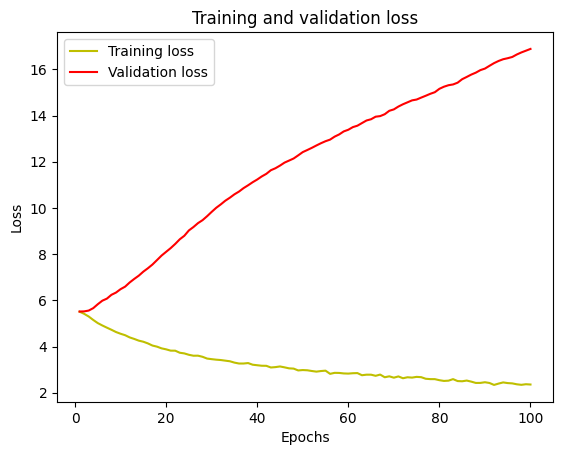

In [28]:

import matplotlib.pyplot as plt
import seaborn as sns

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

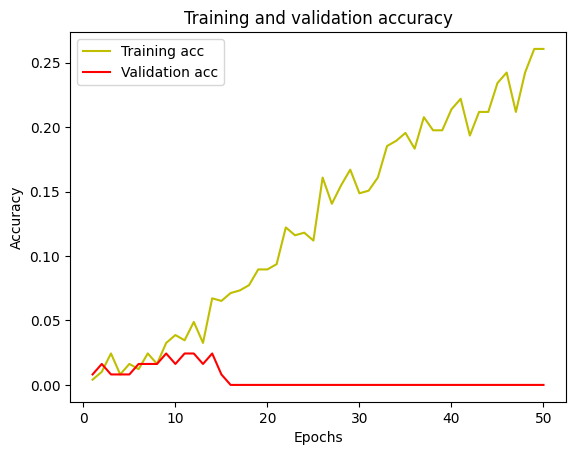

In [23]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.55      0.18      0.27        33
           2       0.59      0.63      0.61       291
           3       0.55      0.67      0.60       440
           4       0.48      0.35      0.40       176
           5       0.33      0.03      0.05        35
           6       0.00      0.00      0.00         1

    accuracy                           0.56       980
   macro avg       0.36      0.26      0.28       980
weighted avg       0.54      0.56      0.54       980

[[  0   0   1   3   0   0   0]
 [  0   6  15  11   1   0   0]
 [  0   3 183  99   5   1   0]
 [  0   2 100 293  45   0   0]
 [  0   0   8 106  61   1   0]
 [  0   0   1  18  15   1   0]
 [  0   0   0   0   1   0   0]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
